In [1]:
import datasets as ds
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import nltk
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
nltk.download('wordnet')
nltk.download('omw-1.4')
from yellowbrick.model_selection import FeatureImportances

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
CUR_DIR = os.path.abspath(os.curdir)
ROOT_DIR = os.path.dirname(CUR_DIR)
IMAGES_DIR = os.path.join(ROOT_DIR, "images")
DATA_DIR = os.path.join(ROOT_DIR, "data")
MODELS_DIR = os.path.join(ROOT_DIR, "models")
MODELS_DIR

'/home/jovyan/projects/vector-nlp/models'

In [3]:
validation_df = pd.read_csv(os.path.join(DATA_DIR,'raw','validation.csv'))
training_df = pd.read_csv(os.path.join(DATA_DIR,'raw','training.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR,'raw','test.csv'))


In [4]:
X_train = training_df['review']
y_train = training_df['star']

X_val = validation_df['review']
y_val = validation_df['star']

X_test = test_df['review']
y_test = test_df['star']


vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
X_val = vect.transform(X_val)

In [5]:
booster = xgb.XGBRegressor()

In [ ]:
params = {
        'learning_rate': [0.1,0.01,0.001],
        'n_estimators': [100,600,1000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [14]:
booster.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [20]:
X_train[25,:].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [26]:
voc_dict = {v: k for k, v in vect.vocabulary_.items()}
voc_dict[19396]

'useless'

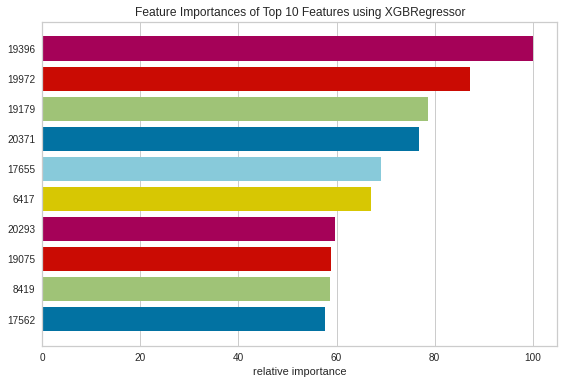

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using XGBRegressor'}, xlabel='relative importance'>

In [9]:
viz = FeatureImportances(booster,topn=10)
viz.fit(X_train, y_train)
viz.show()

In [40]:
features = vect.vocabulary_.keys()
booster = xgb.XGBRegressor(max_depth=20,n_estimators=300)
eval_set = [(X_test, y_test)]
# booster.fit(X_train,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)
booster.fit(X_train,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)
importances = booster.feature_importances_
df = pd.DataFrame({'features':features, 'importance':importances})
df.sort_values('importance',ascending = False).head(20)

[0]	validation_0-mae:2.56658
[1]	validation_0-mae:1.99239
[2]	validation_0-mae:1.61751
[3]	validation_0-mae:1.37442
[4]	validation_0-mae:1.21784
[5]	validation_0-mae:1.11585
[6]	validation_0-mae:1.04740
[7]	validation_0-mae:1.00076
[8]	validation_0-mae:0.96920
[9]	validation_0-mae:0.94331
[10]	validation_0-mae:0.92542
[11]	validation_0-mae:0.91122
[12]	validation_0-mae:0.90058
[13]	validation_0-mae:0.89133
[14]	validation_0-mae:0.88506
[15]	validation_0-mae:0.87931
[16]	validation_0-mae:0.87525
[17]	validation_0-mae:0.87215
[18]	validation_0-mae:0.86846
[19]	validation_0-mae:0.86524
[20]	validation_0-mae:0.86266
[21]	validation_0-mae:0.86034
[22]	validation_0-mae:0.85840
[23]	validation_0-mae:0.85605
[24]	validation_0-mae:0.85340
[25]	validation_0-mae:0.85202
[26]	validation_0-mae:0.85035
[27]	validation_0-mae:0.84909
[28]	validation_0-mae:0.84782
[29]	validation_0-mae:0.84648
[30]	validation_0-mae:0.84537
[31]	validation_0-mae:0.84429
[32]	validation_0-mae:0.84287
[33]	validation_0-ma

,features,importance
20371,scarcity,0.004287
14047,adw,0.003009
19972,lawyer,0.002892
17097,ashraf,0.002529
19396,canceling,0.002419
19179,werk,0.002414
17655,christopher,0.002350
19182,sar,0.002321
8419,alpesh,0.002258
17562,etm,0.002220


In [6]:
from sklearn.feature_selection import SelectKBest, chi2
chi2score = chi2(X_train,y_train)[0]

wscores = zip(vect.get_feature_names(),chi2score)
wchi2 = sorted(wscores,key=lambda x:x[1]) 
topchi2 = zip(*wchi2[-20:])
show=list(topchi2)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_train, y_train)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(vect.get_feature_names(), chi2_selector.scores_, chi2_selector.pvalues_)), 
                                       columns=['ftr', 'score', 'pval'])
chi2_scores.nlargest(20,'score')
chi2_scores.to_csv(os.path.join(DATA_DIR,'output','2.2-Chi-Square-Importance.csv'))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
chi2_scores

,ftr,score,pval
0,00,3.929530,0.415627
1,000,2.328023,0.675672
2,0000,1.281202,0.864557
3,00000,1.498008,0.826994
4,007,1.388394,0.846210
...,...,...,...
21342,ℓιкє,2.167038,0.705068
21343,儿童人3e域名他们就3,13.596863,0.008699
21344,流畅,0.793393,0.939332
21345,简洁,0.793393,0.939332


In [38]:
learning_rate = 0.001,
booster = xgb.XGBRegressor(max_depth=20,n_estimators=300,objective = 'reg:gamma')
eval_set = [(X_test, y_test)]
# booster.fit(X_train,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)
booster.fit(X_train,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:3.37442
[1]	validation_0-mae:3.19165
[2]	validation_0-mae:2.98175
[3]	validation_0-mae:2.77830
[4]	validation_0-mae:2.55183
[5]	validation_0-mae:2.30766
[6]	validation_0-mae:2.07015
[7]	validation_0-mae:1.84045
[8]	validation_0-mae:1.62730
[9]	validation_0-mae:1.45488
[10]	validation_0-mae:1.31751
[11]	validation_0-mae:1.19594
[12]	validation_0-mae:1.11146
[13]	validation_0-mae:1.05218
[14]	validation_0-mae:1.00736
[15]	validation_0-mae:0.97491
[16]	validation_0-mae:0.94595
[17]	validation_0-mae:0.92775
[18]	validation_0-mae:0.91390
[19]	validation_0-mae:0.90374
[20]	validation_0-mae:0.89495
[21]	validation_0-mae:0.88755
[22]	validation_0-mae:0.88156
[23]	validation_0-mae:0.87742
[24]	validation_0-mae:0.87343
[25]	validation_0-mae:0.86936
[26]	validation_0-mae:0.86636
[27]	validation_0-mae:0.86414
[28]	validation_0-mae:0.86240
[29]	validation_0-mae:0.86107
[30]	validation_0-mae:0.85976
[31]	validation_0-mae:0.85803
[32]	validation_0-mae:0.85691
[33]	validation_0-ma

KeyboardInterrupt: 

In [32]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

In [25]:
y_pred = booster.predict(X_val)

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_pred)

0.8052998012912544

In [27]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_val, y_pred))
print(math.sqrt(mean_squared_error(y_val, y_pred)))

1.2212455816123884
1.1050998061769752


In [28]:
max(y_pred)

6.0478687

In [29]:
min(y_pred)

-1.735678

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          4385152   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,459,521
Trainable params: 4,459,521
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.save(os.path.join(MODELS_DIR,'2.1-LSTM_TFIDF'))

2022-03-07 03:35:23.959751: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/jovyan/projects/vector-nlp/models/2.1-LSTM_TFIDF/assets


INFO:tensorflow:Assets written to: /home/jovyan/projects/vector-nlp/models/2.1-LSTM_TFIDF/assets


In [19]:
new_model = tf.keras.models.load_model(os.path.join(MODELS_DIR,'2.1-LSTM_TFIDF'))
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          4385152   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,459,521
Trainable params: 4,459,521
Non-trainable params: 0
_________________________________________________________________


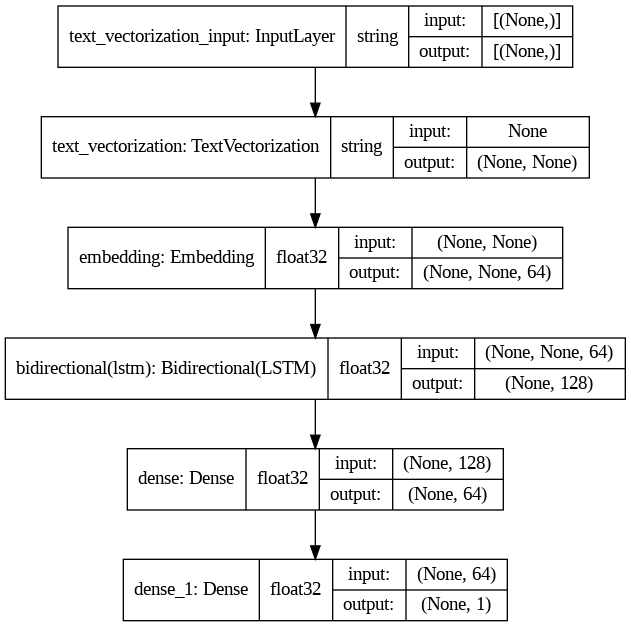

In [33]:
plot_model(model,os.path.join(IMAGES_DIR,'2.1-LSTM_MODEL_PLOT.png'),show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [47]:
model.trainable_variables

[<tf.Variable 'embedding/embeddings:0' shape=(68518, 64) dtype=float32, numpy=
 array([[ 0.06712313,  0.05424743, -0.1264934 , ...,  0.12156942,
          0.05342354, -0.21633689],
        [ 0.01393247, -0.02354094, -0.02287075, ..., -0.04389416,
         -0.02181464,  0.03797568],
        [ 0.0268516 ,  0.00910351,  0.00346383, ..., -0.03365089,
         -0.00678857,  0.04857309],
        ...,
        [ 0.04560035,  0.02324708,  0.01253083, ..., -0.02784825,
         -0.04627706,  0.00642945],
        [-0.01368918,  0.01382928, -0.02744769, ..., -0.03317849,
          0.04011679,  0.03505216],
        [ 0.02736231,  0.03597907, -0.02903325, ...,  0.01892034,
          0.03123759,  0.0149959 ]], dtype=float32)>,
 <tf.Variable 'bidirectional/forward_lstm/lstm_cell_1/kernel:0' shape=(64, 256) dtype=float32, numpy=
 array([[ 0.0156434 , -0.05212928,  0.09991335, ..., -0.07996792,
         -0.10207688, -0.02080583],
        [ 0.00787714, -0.06983537, -0.07847454, ...,  0.00205337,
        

In [49]:
model.get_weights()

[array([b'the', b'it', b'i', ..., b'00006', b'00002323', b'0000000000000'],
       dtype=object),
 array([[ 0.06712313,  0.05424743, -0.1264934 , ...,  0.12156942,
          0.05342354, -0.21633689],
        [ 0.01393247, -0.02354094, -0.02287075, ..., -0.04389416,
         -0.02181464,  0.03797568],
        [ 0.0268516 ,  0.00910351,  0.00346383, ..., -0.03365089,
         -0.00678857,  0.04857309],
        ...,
        [ 0.04560035,  0.02324708,  0.01253083, ..., -0.02784825,
         -0.04627706,  0.00642945],
        [-0.01368918,  0.01382928, -0.02744769, ..., -0.03317849,
          0.04011679,  0.03505216],
        [ 0.02736231,  0.03597907, -0.02903325, ...,  0.01892034,
          0.03123759,  0.0149959 ]], dtype=float32),
 array([[ 0.0156434 , -0.05212928,  0.09991335, ..., -0.07996792,
         -0.10207688, -0.02080583],
        [ 0.00787714, -0.06983537, -0.07847454, ...,  0.00205337,
         -0.09054969, -0.00665109],
        [ 0.06487248, -0.02008178,  0.11067795, ...,  0.

In [53]:
eval_df = pd.merge(X_val, y_val, left_index=True, right_index=True)
eval_df.to_csv(os.path.join(DATA_DIR,'output','2.1-LSTM-Validation-Not-Scored.csv'))
eval_df['prediction'] = model.predict(eval_df.review).ravel()
eval_df['absolute_error'] = (eval_df['prediction'] - eval_df['star']).abs()
eval_df.to_csv(os.path.join(DATA_DIR,'output','2.1-LSTM-Validation-Scored.csv'))

In [50]:
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_df.to_csv(os.path.join(DATA_DIR,'raw','training.csv'))

In [51]:
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df.to_csv(os.path.join(DATA_DIR,'raw','test.csv'))